In [1]:
import glob
import netCDF4
import xarray 
import numpy as np
import datetime as dt
import pandas as pd
from pandas import DataFrame

import os
import csv
import numpy as np                  # For doing math
import matplotlib.pyplot as plt     # For plotting
import matplotlib.dates as mdates   # For formatting dates when plotting
import matplotlib.colors as colors  # For truncating colorbars
import matplotlib.style as style
import xarray as xr                 # For dealing with netCDF data
import pandas as pd                 # A quick way to deal with time stamps

## Open files

In [2]:
df_sd=pd.read_csv('U_superdarn_hrly_winds.csv')
df_wacc=pd.read_csv('U_waccmxdart_hrly_winds.csv')

## Read-in SuperDarn data

In [3]:
df_sd = df_sd.replace(-999.0, np.nan)

# get rid of ugly column name (so we can use datetime)
df_sd.rename(columns = {'# year':'year'}, inplace = True) 

# Create datetime array and insert it into the dataframe
date = pd.to_datetime(df_sd[['year', 'month', 'day', 'hour']])
date = pd.to_datetime(date)
df_sd.insert(0, 'Date', date)

#Get rid of the columns we don't need anymore
df_sd = df_sd.drop(columns=['year', 'month', 'day', 'hour'])

print("Ending dataframe:")
print(df_sd)

Ending dataframe:
                    Date   Kod   Pgr   Sas   Rkn   Pyk   Han
0    2009-01-10 00:00:00 -10.0   NaN   6.0  70.0  27.0  32.0
1    2009-01-10 01:00:00 -10.0   NaN -20.0  79.0  15.0  52.0
2    2009-01-10 02:00:00   1.0   NaN -54.0 -24.0   3.0  24.0
3    2009-01-10 03:00:00 -22.0   NaN -26.0   NaN  21.0 -15.0
4    2009-01-10 04:00:00 -19.0   NaN  -2.0   NaN  27.0   6.0
...                  ...   ...   ...   ...   ...   ...   ...
1651 2009-03-19 19:00:00  10.0  26.0  20.0   NaN  19.0  16.0
1652 2009-03-19 20:00:00   3.0  11.0   1.0  46.0 -21.0   4.0
1653 2009-03-19 21:00:00   8.0 -13.0  -0.0   4.0  -3.0  -0.0
1654 2009-03-19 22:00:00   NaN  12.0  23.0   NaN   5.0 -15.0
1655 2009-03-19 23:00:00   NaN   4.0   7.0  36.0  -1.0 -36.0

[1656 rows x 7 columns]


## Manipulating WACCMXDART file

In [4]:
df_wacc = df_wacc.replace(-999.0, np.nan)

# get rid of ugly column name (so we can use datetime)
df_wacc.rename(columns = {'# year':'year'}, inplace = True) 

# Create datetime array and insert it into the dataframe
date = pd.to_datetime(df_wacc[['year', 'month', 'day', 'hour']])
date = pd.to_datetime(date)
df_wacc.insert(0, 'Date', date)

#Get rid of the columns we don't need anymore
df_wacc = df_wacc.drop(columns=['year', 'month', 'day', 'hour'])

print("Ending dataframe:")
print(df_wacc)

Ending dataframe:
                    Date    Kod    Pgr    Sas    Rkn    Pyk    Han
0    2009-01-10 00:00:00  11.96  49.63  17.93 -40.34  28.02  -5.95
1    2009-01-10 01:00:00  23.09  36.78   0.53 -41.67  12.09 -10.19
2    2009-01-10 02:00:00  32.33  10.57  -6.58 -25.73   5.85 -19.60
3    2009-01-10 03:00:00  12.08  -0.12  -4.95 -21.52  18.90 -25.86
4    2009-01-10 04:00:00  -4.58  14.30   2.23 -26.33  27.68 -22.30
...                  ...    ...    ...    ...    ...    ...    ...
1651 2009-03-19 19:00:00 -29.69  28.22  25.15 -10.50   2.29  -4.38
1652 2009-03-19 20:00:00 -46.92  22.37  24.92   6.30  -0.20   3.96
1653 2009-03-19 21:00:00 -52.47  25.45  32.45  -0.92 -10.16  11.78
1654 2009-03-19 22:00:00 -66.03  37.12  38.95   0.36 -15.54   2.33
1655 2009-03-19 23:00:00 -58.50  33.88  40.98  15.76 -19.47 -17.80

[1656 rows x 7 columns]


## Set Date as index for both datasets

In [5]:
df_sd=df_sd.set_index('Date')

In [6]:
df_wacc=df_wacc.set_index('Date')

## Making graphs for the 6 different stations

In [ ]:
#Kod radar station 
fig1=plt.figure(figsize=(20,8))
plt.plot(df_sd.index,df_sd['Kod'], label='Kod observation')
plt.plot(df_wacc.index,df_wacc['Kod'], label= 'Kod model')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel('Time',fontsize=18,fontweight='bold')
plt.ylabel('Hourly U [m s$^{-1}$]', fontsize=18,fontweight='bold')
plt.axhline(0, c='r', linestyle='--') #plot the 0 line
plt.legend(fontsize=15)
plot_label_name = 'Kod'
plt.savefig(plot_label_name+".png")


#Sas radar station
fig2=plt.figure(figsize=(20,8))
plt.plot(df_sd.index,df_sd['Sas'], label='Sas observation', color = 'red')
plt.plot(df_wacc.index,df_wacc['Sas'], label= 'Sas model', color = 'darkgreen')
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel('Time',fontsize=15,fontweight='bold')
plt.ylabel('Hourly U [m s$^{-1}$]', fontsize=15,fontweight='bold')
plt.axhline(0, c='r', linestyle='--') #plot the 0 line
plt.legend(fontsize=15)
# plot_label_name = 'Sas'
# plt.savefig(plot_label_name+".png")

#Pgr radar station
fig3=plt.figure(figsize=(20,8))
plt.plot(df_sd.index,df_sd['Pgr'], label='Pgr observation', color = 'purple')
plt.plot(df_wacc.index,df_wacc['Pgr'], label= 'Pgr model', color = 'yellow')
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel('Time',fontsize=15,fontweight='bold')
plt.ylabel('Hourly U [m s$^{-1}$]', fontsize=15,fontweight='bold')
plt.axhline(0, c='r', linestyle='--') #plot the 0 line
plt.legend(fontsize=15)
# plot_label_name = 'Pgr'
# plt.savefig(plot_label_name+".png")

#Rkn radar station
fig4=plt.figure(figsize=(20,8))
plt.plot(df_sd.index,df_sd['Rkn'], label='Rkn observation', color = 'darkorange')
plt.plot(df_wacc.index,df_wacc['Rkn'], label= 'Rkn model', color = 'darkblue')
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel('Time',fontsize=15,fontweight='bold')
plt.ylabel('Hourly U [m s$^{-1}$]', fontsize=15,fontweight='bold')
plt.axhline(0, c='r', linestyle='--') #plot the 0 line
plt.legend(fontsize=15)
# plot_label_name = 'Rkn'
# plt.savefig(plot_label_name+".png")

#Pyk radar station
fig5=plt.figure(figsize=(20,8))
plt.plot(df_sd.index,df_sd['Pyk'], label='Pyk observation', color = 'lime')
plt.plot(df_wacc.index,df_wacc['Pyk'], label= 'Pyk model', color = 'crimson')
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel('Time',fontsize=15,fontweight='bold')
plt.ylabel('Hourly U [m s$^{-1}$]', fontsize=15,fontweight='bold')
# plt.axvline(dt.datetime(2009,2,25))
# plt.axvline(dt.datetime(2009,3,12))
# plt.axhline(y=0)
plt.axhline(0, c='r', linestyle='--') #plot the 0 line
plt.legend(fontsize=15)
# plot_label_name = 'Pyk'
# plt.savefig(plot_label_name+".png")

#Han radar station
fig5=plt.figure(figsize=(20,8))
plt.plot(df_sd.index,df_sd['Han'], label='Han observation', color = 'pink')
plt.plot(df_wacc.index,df_wacc['Han'], label= 'Han model', color = 'blue')
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel('Time',fontsize=18,fontweight='bold')
plt.ylabel('Hourly U [m s$^{-1}$]', fontsize=18,fontweight='bold')
plt.axhline(0, c='r', linestyle='--') #plot the 0 line
plt.legend(fontsize=15)
plot_label_name = 'Han'
plt.savefig(plot_label_name+".png")

In [ ]:
#data from 2009-02-15 to 2009-02-24 in the superdarn observations
x=df_sd.iloc[(df_sd.index>='2009-02-15 00:00:00') & (df_sd.index <= '2009-02-24 00:00:00')]

In [ ]:
#data from 2009-02-15 to 2009-02-24 in the WACCMXDART model
x1=df_wacc.iloc[(df_wacc.index>='2009-02-15 00:00:00') & (df_wacc.index <= '2009-02-24 00:00:00')]

In [ ]:
difference=df_sd['Han']-df_wacc['Han']

In [ ]:
df_sd['Han'].max()

In [ ]:
difference.max()

In [ ]:
df_wacc['Han'].min()

In [ ]:
difference

In [ ]:
df_sd['Han']

In [ ]:
df_wacc['Han']

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(difference.index,difference, label='diferrence', color = 'pink')
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel('Time',fontsize=15,fontweight='bold')
plt.ylabel('difference', fontsize=15,fontweight='bold')
plt.legend(fontsize=15)
plt.axhline(141.6, c='r', linestyle='--') #plot the 0 line

In [ ]:
x2=df_sd.iloc[(df_sd.index>='2009-02-25 00:00:00') & (df_sd.index <= '2009-03-12 00:00:00')]
x3=df_wacc.iloc[(df_wacc.index>='2009-02-25 00:00:00') & (df_wacc.index <= '2009-03-12 00:00:00')]

In [ ]:
#Graph for the data recorded by the Han station from 02-15 to 02-24
plt.figure(figsize=(20,8))
plt.plot(x.index,x['Han'], label='Han observation', color = 'pink')
plt.plot(x1.index,x1['Han'], label= 'Han model', color = 'blue')
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel('Time',fontsize=15,fontweight='bold')
plt.ylabel('Hourly U [m s$^{-1}$]', fontsize=15,fontweight='bold')
plt.legend(fontsize=15)
plt.grid()
plt.axhline(0, c='r', linestyle='--') #plot the 0 line
plot_label_name = 'Han_Feb-march'
plt.savefig(plot_label_name+".png")

#Graph for the data recorded by the Pyk station from 01-15 to 02-04
plt.figure(figsize=(20,8))
plt.plot(x2.index,x2['Pyk'], label='Ryk observation', color = 'red')
plt.plot(x3.index,x3['Pyk'], label= 'Ryk model', color = 'green')
plt.tick_params(axis='x', labelsize=16)
plt.tick_params(axis='y', labelsize=16)
plt.xlabel('Time',fontsize=15,fontweight='bold')
plt.ylabel('Hourly U [m s$^{-1}$]', fontsize=15,fontweight='bold')
plt.legend(fontsize=15)
plt.axvline(dt.datetime(2009,2,28), label='02/28')
plt.axvline(dt.datetime(2009,3,6))
plt.grid()
# plt.axhline(0, c='r', linestyle='--') #plot the 0 line
# plot_label_name = 'Han'
# plt.savefig(plot_label_name+".png")

## Scatter plotting 


In [ ]:
#Han station 02-15 to 02-24
plt.scatter(x['Han'],x1['Han'])
plt.xlabel('Superdarn',fontsize=12,fontweight='bold')
plt.ylabel('WACCMXDART',fontsize=12,fontweight='bold')
plt.ylim(-100,100)
plt.xlim(-100,100)
plt.show()

#Pyk station 01-10 to 02-04
plt.scatter(x2['Pyk'],x3['Pyk'])
plt.xlabel('Superdarn',fontsize=12,fontweight='bold')
plt.ylabel('WACCMXDART',fontsize=12,fontweight='bold')
plt.ylim(-100,100)
plt.xlim(-100,100)
plt.show()

In [ ]:
plt.figure(figsize=(25,12))
(df_sd.Han[df_sd.index.month==2]).plot()
(df_wacc.Han[df_wacc.index.month==2]).plot()

In [ ]:
difference2=df_sd['Kod']-df_wacc['Kod']

In [ ]:
difference2.max()

**Scatter Plot for Statistical Analysis**

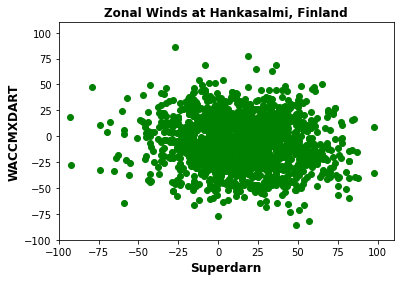

In [7]:
#Scatter plot at Hankasalmi
plt.scatter(df_sd['Han'],df_wacc['Han'], color ='g')
plt.xlabel('Superdarn',fontsize=12,fontweight='bold')
plt.ylabel('WACCMXDART',fontsize=12,fontweight='bold')
plt.ylim(-100,110)
plt.xlim(-100,110)
plt.title("Zonal Winds at Hankasalmi, Finland", fontsize=12,fontweight='bold')
plt.show()

In [ ]:
plt.scatter(df_sd['Kod'],df_wacc['Kod'], color ='g')
plt.xlabel('Superdarn',fontsize=12,fontweight='bold')
plt.ylabel('WACCMXDART',fontsize=12,fontweight='bold')
plt.ylim(-100,110)
plt.xlim(-100,110)
plt.title("Zonal Winds at Kodiak, Alaska", fontsize=12,fontweight='bold')
plt.show()